# Regresión Logística: Detección de Fraude en Tarjetas de Crédito

En este ejercicio, se muestra cómo implementar una regresión logística para predecir transacciones fraudulentas utilizando el conjunto de datos de detección de fraude en tarjetas de crédito.

## Enunciado del ejercicio
El objetivo es construir un sistema de aprendizaje automático capaz de predecir si una transacción con tarjeta de crédito es fraudulenta o no, basado en varias características. Para ello, utilizaremos el siguiente conjunto de datos (DATASET):

##### [Credit Card Fraud Detection Dataset](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)
El dataset contiene 284,807 transacciones con 31 características:

1. V1-V28: Características anónimas resultantes de un PCA (Análisis de Componentes Principales).
2. Amount: Monto de la transacción.
3. Class: 1 si la transacción es fraudulenta, 0 si no lo es.


In [1]:
#Carga y Preprocesamiento del Dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar el dataset
df = pd.read_csv('creditcard.csv')

# Mostrar las primeras filas del dataset
print(df.head())

# Separar características (X) y etiquetas (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [2]:
#Entrenamiento del Modelo de Regresión Logística
from sklearn.linear_model import LogisticRegression

# Crear el modelo de regresión logística
clf = LogisticRegression()

# Entrenar el modelo
clf.fit(X_train, y_train)

# Realizar predicciones
y_pred = clf.predict(X_test)

# Evaluar el modelo
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.3f}".format(accuracy))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.999
Confusion Matrix:
 [[56854    10]
 [   43    55]]


In [3]:
#Evaluación y resultados
from sklearn.metrics import accuracy_score, confusion_matrix

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.3f}".format(accuracy))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.999
Confusion Matrix:
 [[56854    10]
 [   43    55]]


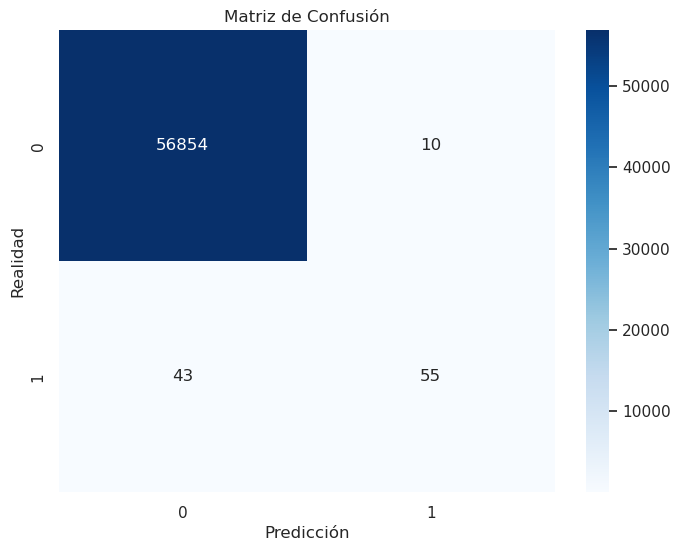

In [4]:
#Visualización y resultados
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()


/tmp/ipykernel_6688/3334658031.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='viridis')


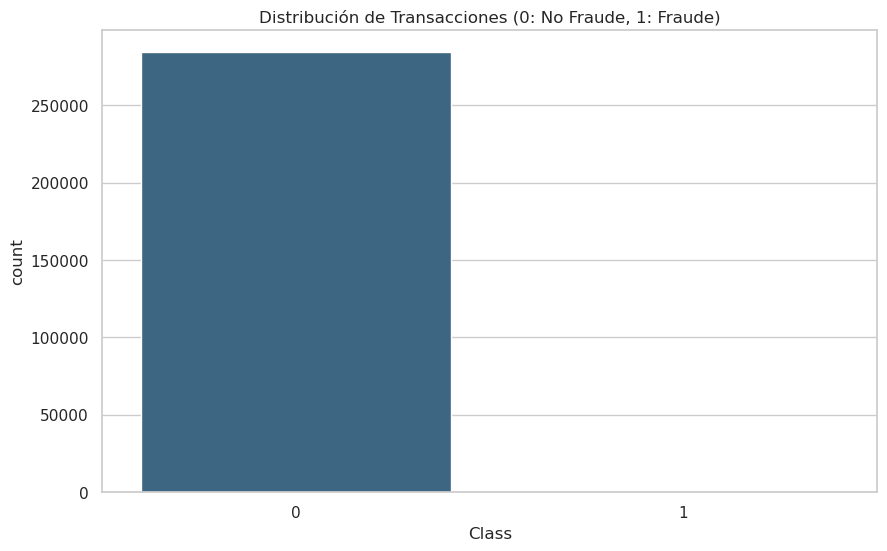

In [5]:
# Visualizacion de transacciones Fraudulentas y no Fraudulentas
plt.figure(figsize=(10,6))
sns.countplot(x='Class', data=df, palette='viridis')
plt.title('Distribución de Transacciones (0: No Fraude, 1: Fraude)')
plt.show()

/tmp/ipykernel_6688/2605426.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=df, palette='viridis')


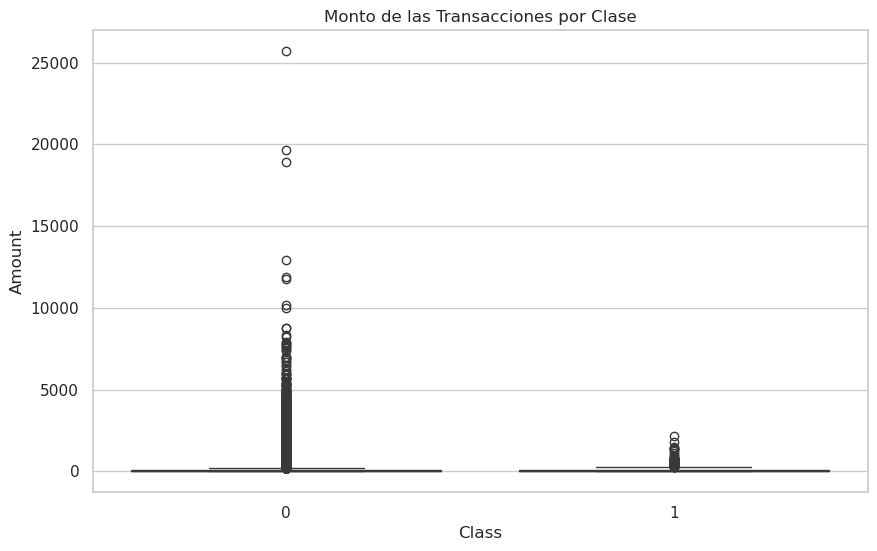

In [6]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Class', y='Amount', data=df, palette='viridis')
plt.title('Monto de las Transacciones por Clase')
plt.show()

Class
0    284315
1       492
Name: count, dtype: int64


/tmp/ipykernel_6688/1918614289.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='viridis')


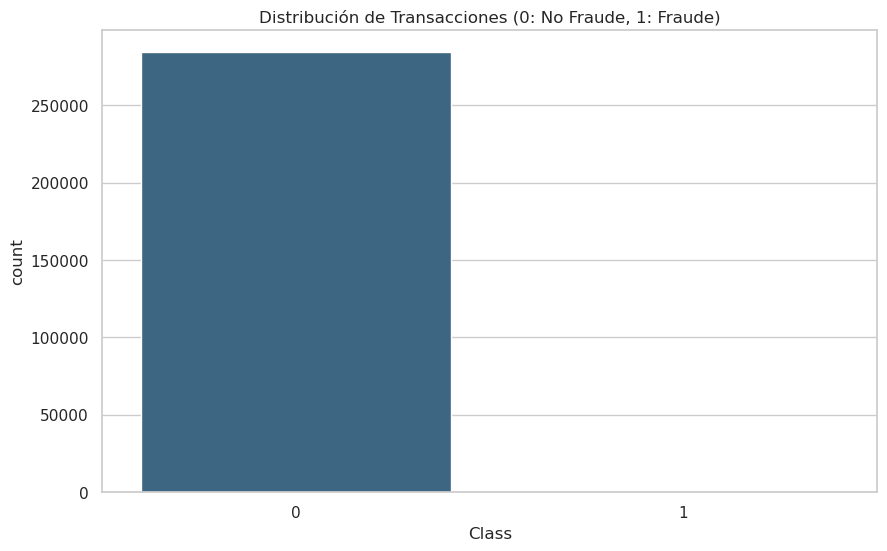

In [7]:
# Verificar la distribución de las clases
print(df['Class'].value_counts())

# Visualizar la distribución de las clases
plt.figure(figsize=(10,6))
sns.countplot(x='Class', data=df, palette='viridis')
plt.title('Distribución de Transacciones (0: No Fraude, 1: Fraude)')
plt.show()
!pip install --upgrade scikit-learn imbalanced-learn


In [9]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)



In [10]:
# Entrenamiento y evaluación con datos equilibrados
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.3f}".format(accuracy))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.974
Confusion Matrix:
 [[55734  1016]
 [ 1954 55022]]


/home/sanraku/anaconda3/envs/miEntorno1/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


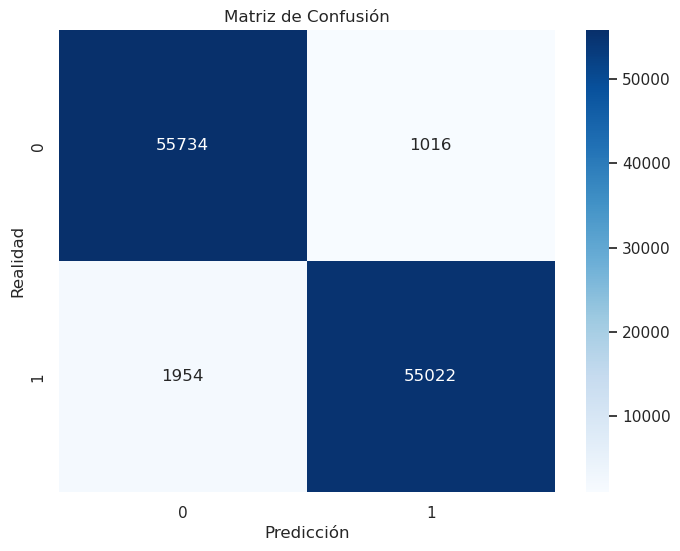

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()